In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ENS_2017_valida = pd.read_csv("../Data/Bases_trabajo/ENS_2017_valida.csv", sep =',')

In [3]:
# Se elimina la columna 'Unnamed: 0'
TO_ENS_2017_valida = ['Unnamed: 0']
ENS_2017_valida.drop(TO_ENS_2017_valida, inplace = True, axis=1)


In [4]:
ENS_2017_valida.shape

(23089, 51)

In [5]:
import sys, os
path = os.getcwd()
k = os.path.dirname(path)
k = k + os.sep + "src"
sys.path.append(k)


In [6]:
import utils.Mining_data as md
Top_correlations = md.get_top_abs_correlations(ENS_2017_valida, 34)



In [7]:
freq_R = ENS_2017_valida['Salud_percibida'].value_counts() / len(ENS_2017_valida['Salud_percibida'])*100
freq_R

2    48.269739
3    23.955130
1    18.147170
4     7.466759
5     2.161202
Name: Salud_percibida, dtype: float64

### Agrupo los valores de la variable dependiente (VD): 'salud percibida', en 3 categorías. 'Muy buena' y 'buena'=1, 'Regular'= 2, 'Muy mala' y 'Mala' = 3

In [8]:
# Creo una base de datos en la que la VD tendrán 3 valores

ENS_2017_valida_1 = ENS_2017_valida

In [9]:
ENS_2017_valida_1['Salud_percibida'] = ENS_2017_valida_1['Salud_percibida'].replace({2:1,3:2,4:3,5:3})

In [10]:
freq_R_1 = ENS_2017_valida_1['Salud_percibida'].value_counts() / len(ENS_2017_valida_1['Salud_percibida'])*100
freq_R_1

1    66.416908
2    23.955130
3     9.627961
Name: Salud_percibida, dtype: float64

In [11]:
ENS_2017_valida_1.to_csv('../data/Bases_trabajo/ENS_2017_valida_1.csv')

### Vemos las correlaciones de todas las variables entre sí. Nos centramos en la de la VD con el resto

In [12]:
Salud_percibida_1 = ENS_2017_valida_1.iloc[:,[10,0,1,2,3,4,5,6,7,8,9]]

In [13]:
Salud_percibida_2 = ENS_2017_valida_1.iloc[:,[10,11,12,13,14,15,16,17,18]]

In [14]:
Salud_percibida_3 = ENS_2017_valida_1.iloc[:,[10,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]

In [15]:
Salud_percibida_4 = ENS_2017_valida_1.iloc[:,[10,35,36,37,38,39,40,41,42,43,44,45,46,47,48]]

In [16]:
Salud_percibida_5 = ENS_2017_valida_1.iloc[:,[10,49,50]]

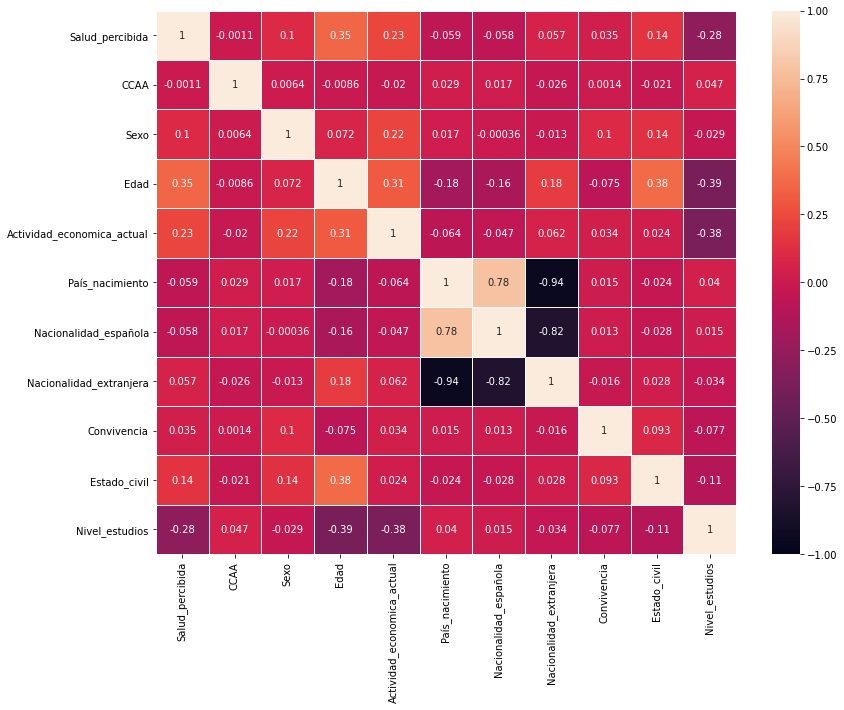

In [17]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(Salud_percibida_1.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

plt.savefig("../reports/heatmap/Salud_percibida_1.jpg", bbox_inches='tight')

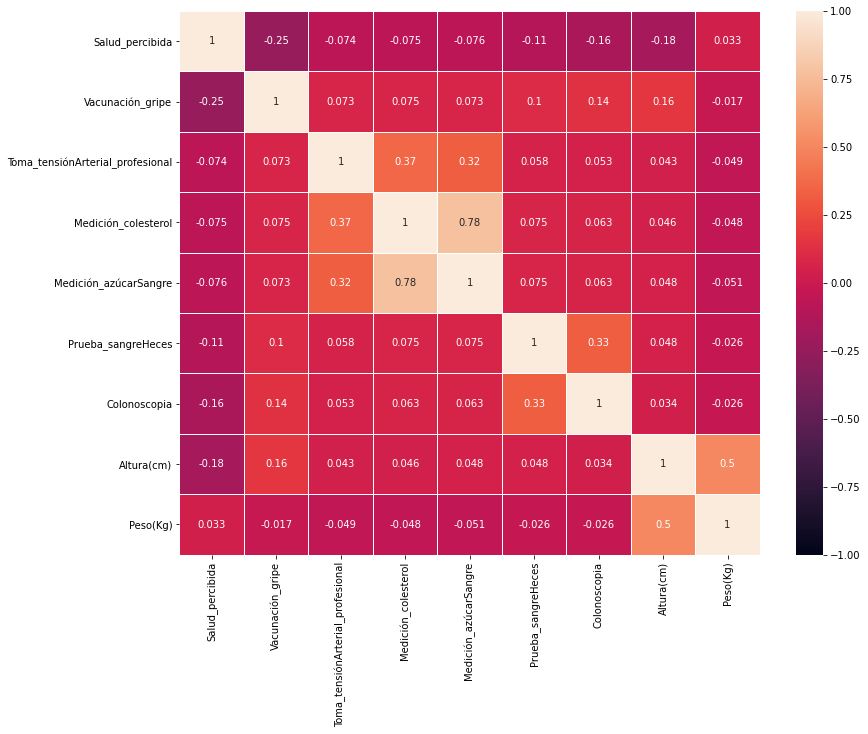

In [18]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(Salud_percibida_2.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)
plt.savefig("../reports/heatmap/Salud_percibida_2.jpg", bbox_inches='tight')

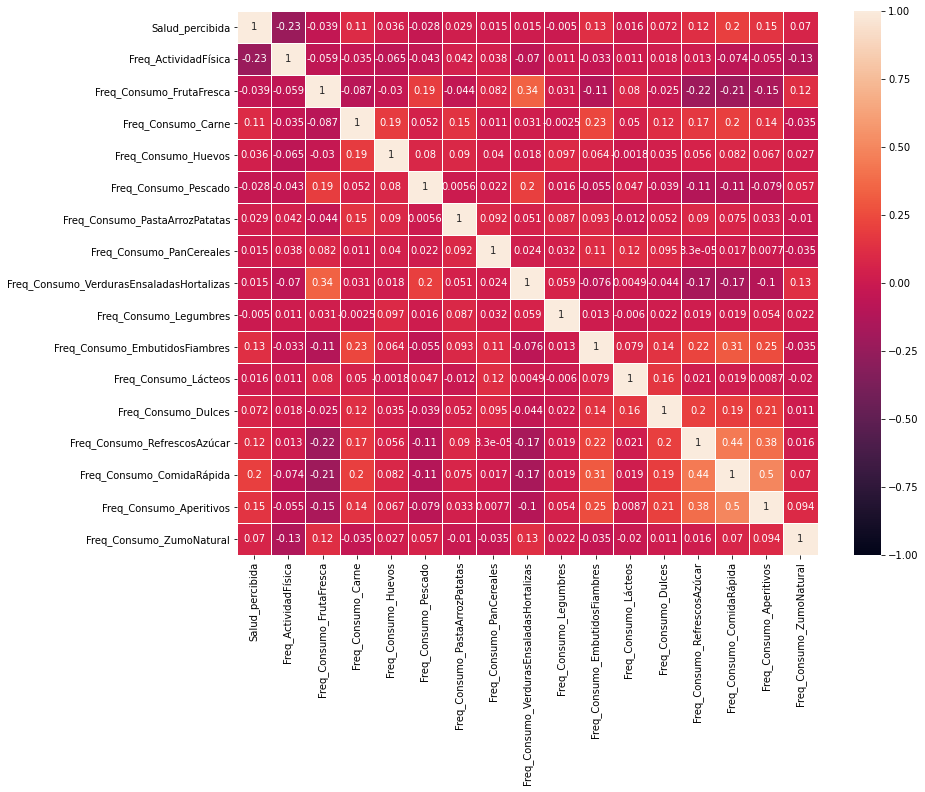

In [19]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(Salud_percibida_3.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

plt.savefig("../reports/heatmap/Salud_percibida_3.jpg", bbox_inches='tight')

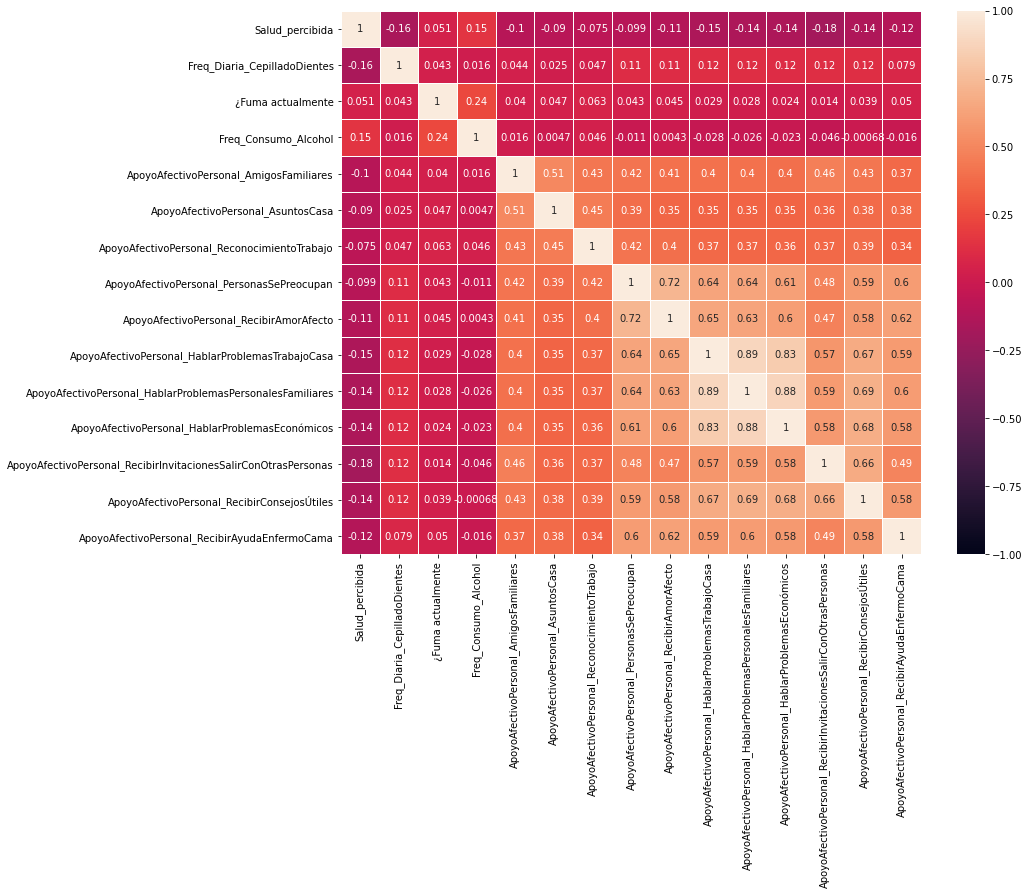

In [20]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(Salud_percibida_4.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

plt.savefig("../reports/heatmap/Salud_percibida_4.jpg", bbox_inches='tight')

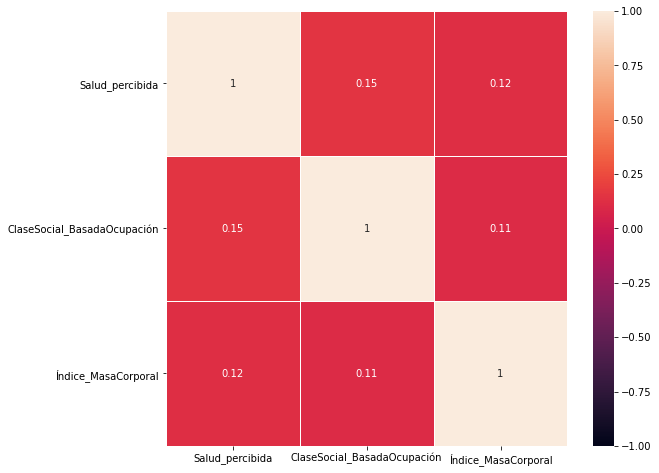

In [21]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(Salud_percibida_5.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)
plt.savefig("../reports/heatmap/Salud_percibida_5.jpg", bbox_inches='tight')

#### Las correlaciones más relevantes de las variables independientes (VI) con la VD son:
### Variables sociodemográficas:
#### - Edad: .35
#### - Situación económica actual: .23
#### - Estado civil: .14
#### - Nivel de estudios: -.28
#### - Clase social basada en la ocupación: .15
### Variables relacionadas con prevención de la salud:
#### - Vacunación de la gripe: -.25
#### - Sangre en heces: -.11
#### - Colonoscopia: -.16
### Variables relacionada con la actividad física:
#### - Actividad física: -.23
### Variables relacionadas con los hábitos de alimentación:
#### - Consumo de carne: .11
#### - Consumo de fiambre y embutidos: .13
#### - Consumo de refrescos de azúcar: .12
#### - Consumo de comida rápida: .2
#### - Consumo de aperitivos: .15
#### - Consumo de alcohol: .15
### Variables relacionadas con hábitos de higiene dental:
#### - Cepillado de dientes: -.16
### Variables relacionadas con apoyo social:
#### - Apoyo de amigos y familiares: -.1
#### - Personas que se preocupan por tí: .1
#### - Recibir amor y afecto: -.12
#### - Hablar de problemas de casa: -.15
#### - Hablar de problemas personales: -.15
#### - Hablar de problemas económicos: -.15
#### - Recibir invitaciones para salir: -.19
#### - Recibir consejos útiles: -.14
#### - Ayuda cuando se está enfermo:-.12
### Variables relacionadas índice de masa corporal:
#### - IMC: .14
#### - Altura: -.18



### Eliminar las variables independientes entre las que existe colinealidad (Pearson >= 0,4)

#### - País de nacimiento
#### - Nacionalidad extranjera
#### - Medición de azúcar en sangre
#### - Altura
#### - Consumo de refrescos de azúcar
#### - Consumo de aperitivos
#### - ApoyoAfectivoPersonal_AsuntosCasa
#### - ApoyoAfectivoPersonal_ReconocimientoTrabajo
#### - ApoyoAfectivoPersonal_PersonasSePreocupan
#### - ApoyoAfectivoPersonal_RecibirAmorAfecto
#### - ApoyoAfectivoPersonal_HablarProblemasTrabajoCasa
#### - ApoyoAfectivoPersonal_HablarProblemasPersonalesFamiliares
#### - ApoyoAfectivoPersonal_HablarProblemasEconómicos
#### - ApoyoAfectivoPersonal_RecibirInvitacionesSalirConOtrasPersonas
#### - ApoyoAfectivoPersonal_RecibirConsejosÚtiles
#### - ApoyoAfectivoPersonal_RecibirAyudaEnfermoCama

In [22]:
ENS_2017_valida_1.columns

Index(['CCAA', 'Sexo', 'Edad', 'Actividad_economica_actual', 'País_nacimiento',
       'Nacionalidad_española', 'Nacionalidad_extranjera', 'Convivencia',
       'Estado_civil', 'Nivel_estudios', 'Salud_percibida', 'Vacunación_gripe',
       'Toma_tensiónArterial_profesional', 'Medición_colesterol',
       'Medición_azúcarSangre', 'Prueba_sangreHeces', 'Colonoscopia',
       'Altura(cm)', 'Peso(Kg)', 'Freq_ActividadFísica',
       'Freq_Consumo_FrutaFresca', 'Freq_Consumo_Carne', 'Freq_Consumo_Huevos',
       'Freq_Consumo_Pescado', 'Freq_Consumo_PastaArrozPatatas',
       'Freq_Consumo_PanCereales', 'Freq_Consumo_VerdurasEnsaladasHortalizas',
       'Freq_Consumo_Legumbres', 'Freq_Consumo_EmbutidosFiambres',
       'Freq_Consumo_Lácteos', 'Freq_Consumo_Dulces',
       'Freq_Consumo_RefrescosAzúcar', 'Freq_Consumo_ComidaRápida',
       'Freq_Consumo_Aperitivos', 'Freq_Consumo_ZumoNatural',
       'Freq_Diaria_CepilladoDientes', '¿Fuma actualmente',
       'Freq_Consumo_Alcohol', 'ApoyoA

In [23]:
# Creamos una nueva base de datos en la que se eliminan las columnas con variables colineales
ENS_2017_valida_2 = ENS_2017_valida_1

In [24]:
TO_ENS_2017_valida_2 = ['País_nacimiento','Nacionalidad_extranjera','Medición_azúcarSangre','Altura(cm)','Freq_Consumo_RefrescosAzúcar', 'Freq_Consumo_Aperitivos','ApoyoAfectivoPersonal_AsuntosCasa',
       'ApoyoAfectivoPersonal_ReconocimientoTrabajo',
       'ApoyoAfectivoPersonal_PersonasSePreocupan',
       'ApoyoAfectivoPersonal_RecibirAmorAfecto',
       'ApoyoAfectivoPersonal_HablarProblemasTrabajoCasa',
       'ApoyoAfectivoPersonal_HablarProblemasPersonalesFamiliares',
       'ApoyoAfectivoPersonal_HablarProblemasEconómicos',
       'ApoyoAfectivoPersonal_RecibirInvitacionesSalirConOtrasPersonas',
       'ApoyoAfectivoPersonal_RecibirConsejosÚtiles',
       'ApoyoAfectivoPersonal_RecibirAyudaEnfermoCama',]

ENS_2017_valida_2.drop(TO_ENS_2017_valida_2, inplace = True, axis=1)

In [25]:
ENS_2017_valida_2.to_csv('../data/Bases_trabajo/ENS_2017_valida_2.csv')

In [26]:
ENS_2017_valida_2.shape

(23089, 35)